# Roaller Coaster Analysis


### 0- Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import plotly.express as px
import folium 
import warnings
warnings.filterwarnings("ignore")

### 1 - Pull Data about Roller Coasters from Wikipedia aprox 691
https://en.wikipedia.org/wiki/Category:Roller_coaster_introductions_by_year


#### Gathering from Wikipedia
#### 1- Get a list of all the roaler coasters from the category
#### 2- Iterate over each and load  the page using the wiki api
#### 3- Pull keys statistics and gather into a dataset



### 1- Import data 
(https://www.kaggle.com/datasets/robikscube/rollercoaster-database?resource=download)

In [42]:
columns= ['coaster_name','Length','Speed']
df = pd.read_excel('C:\LOCAL-KATHERIN\Project-Kath\RollerCoaster\coaster_db.xlsx')

df

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean,Unnamed: 56
0,Switchback Railway,600Â ft (180Â m),6 mph (9.7 km/h),Coney Island,Removed,"JuneÂ 16,Â 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9,NaN
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,"3,444Â ft (1,050Â m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55Â in (140Â cm),NaN,...,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7,NaN
1083,Pantheon (roller coaster),"3,328Â ft (1,014Â m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,SteelÂ â€“ Launched,Intamin,NaN,Blitz Coaster,...,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN,NaN
1084,Tron Lightcycle Power Run,"3,169.3Â ft (966.0Â m)",59.3[1] mph (95.4 km/h),Other,NaN,"JuneÂ 16,Â 2016",SteelÂ â€“ Launched,Vekoma,4[2]Â ft (122Â cm),Motorbike roller coaster,...,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0,NaN
1085,Tumbili,770Â ft (230Â m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,SteelÂ â€“ 4th DimensionÂ â€“ Wing Coaster,S&S â€“ Sansei Technologies,NaN,4D Free Spin,...,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN,NaN


### 2 - Data Understanding

In [3]:
df.shape

(1087, 57)

In [4]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean', 'Unnamed: 56'],
      dtype='object')

In [5]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                        object
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [6]:
df.describe()

,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Gforce_clean,Unnamed: 56
count,1048.000000,774.000000,7.750000e+02,905.000000,905.000000,930.000000,169.000000,354.000000,1.0
mean,1994.562023,336436.983075,-3.449441e+05,54.083094,48.722873,89.672409,102.597633,3.835000,0.0
std,23.645584,187752.500573,6.859064e+05,23.603693,16.715659,138.402039,67.412307,0.988661,NaN
min,1884.000000,-338012.000000,-1.230357e+06,5.000000,5.000000,4.000000,13.100000,0.800000,0.0
25%,1988.000000,295974.500000,-8.332500e+05,40.000000,37.300000,44.000000,51.800000,3.400000,0.0
50%,2000.000000,391767.000000,-7.397780e+05,50.000000,49.700000,79.000000,91.900000,4.000000,0.0
75%,2010.000000,434840.750000,6.431500e+03,64.000000,58.000000,113.000000,131.200000,4.500000,0.0
max,2022.000000,632309.000000,1.534265e+06,240.000000,149.100000,3937.000000,377.300000,12.000000,0.0


### 3- Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [44]:
df=df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 'Status', 
    #'Opening date',
    #'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
    #   'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
    #  'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #'Track layout', 'Fastrack available', 'Soft opening date.1',
    #'Closing date', 
    #'Opened', 'Replaced by', 'Website',
    #  'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    # 'Single rider line available', 'Restraint Style',
    #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
    'year_introduced', 'latitude', 'longitude', 'Type_Main',
    'opening_date_clean',
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
    'speed_mph', 
    #'height_value', 'height_unit', 
    'height_ft',
     'Inversions_clean', 'Gforce_clean'
   ]].copy()

In [8]:
df.shape

(1087, 13)

In [9]:
df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced       float64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean       object
Gforce_clean          float64
dtype: object

In [45]:
#convert a column opening_date_clean in data type

# We can set errors='coerce' to convert invalid parsing to NaT (Not-a-Time), which represents missing or unknown dates.
df['opening_date_clean']=pd.to_datetime(df['opening_date_clean'],errors='coerce')
df

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884.0,40574.00,-73978.00,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895.0,40578.00,-73979.00,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896.0,41.58,-81.57,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901.0,405745.00,-73978.00,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901.0,393538.00,-744342.00,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022.0,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022.0,372339.00,-766426.00,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022.0,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S â€“ Sansei Technologies,2022.0,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [46]:
#Rename columns
df=df.rename(columns={'coaster_name':'Coaster_Name',
                  'year_introduced':'Year_Introduced',
                  'opening_date_clean':'Opening_date',
                  'speed_mph':'Speed_mph',
                  'height_ft':'Height_ft',
                  'Inversions_clean':'Inversions',
                  'Gforce_clean;;;':'Gforce'})

In [12]:
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884.0,40574.00,-73978.00,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895.0,40578.00,-73979.00,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896.0,41.58,-81.57,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901.0,405745.00,-73978.00,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901.0,393538.00,-744342.00,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022.0,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022.0,372339.00,-766426.00,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022.0,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S â€“ Sansei Technologies,2022.0,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [13]:
#Identify missing values or null values
df.isna().sum()

Coaster_Name         0
Location             2
Status             216
Manufacturer        91
Year_Introduced     39
latitude           313
longitude          312
Type_Main           38
Opening_date       285
Speed_mph          182
Height_ft          918
Inversions          38
Gforce_clean       733
dtype: int64

In [14]:
#check for duplicated Coaster_name
df.loc[df.duplicated(subset='Coaster_Name')]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927.0,428617.00,-790598.0,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937.0,42.42,-70986.0,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938.0,416349.00,-80318.0,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980.0,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986.0,438427.00,-795423.0,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021.0,416343.00,-803165.0,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022.0,280339.00,-824231.0,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022.0,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [15]:
#cheking an example duplicated
df.query('Coaster_Name=="Wipeout (roller coaster)"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce_clean
268,Wipeout (roller coaster),Pleasurewood Hills,Operating,Vekoma,1988.0,525075.0,17434.0,Steel,2007-01-01,50.0,NaN,6,NaN
749,Wipeout (roller coaster),Pleasurewood Hills,Operating,Vekoma,2007.0,525075.0,17434.0,Steel,2007-01-01,50.0,NaN,6,NaN


In [16]:
#dropping duplicated rows 
df=df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_date'])]
df=df.reset_index(drop=True)
df

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884.0,40574.00,-73978.00,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895.0,40578.00,-73979.00,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896.0,41.58,-81.57,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901.0,405745.00,-73978.00,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901.0,393538.00,-744342.00,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022.0,284088.00,-814633.00,Steel,2022-02-01,52.0,NaN,0,NaN
985,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022.0,-279574.00,1534263.00,Wood,2022-01-01,49.7,105.0,0,NaN
986,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022.0,372339.00,-766426.00,Steel,2022-01-01,73.0,NaN,2,NaN
987,Tumbili,Kings Dominion,Under construction,S&S â€“ Sansei Technologies,2022.0,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [17]:
df.shape

(989, 13)

### 4- Feature Understanding


#### Top Years Coasters Introduced

<Axes: title={'center': 'Top Years Coasters Introduced'}, xlabel='Year Introduced', ylabel='Count'>

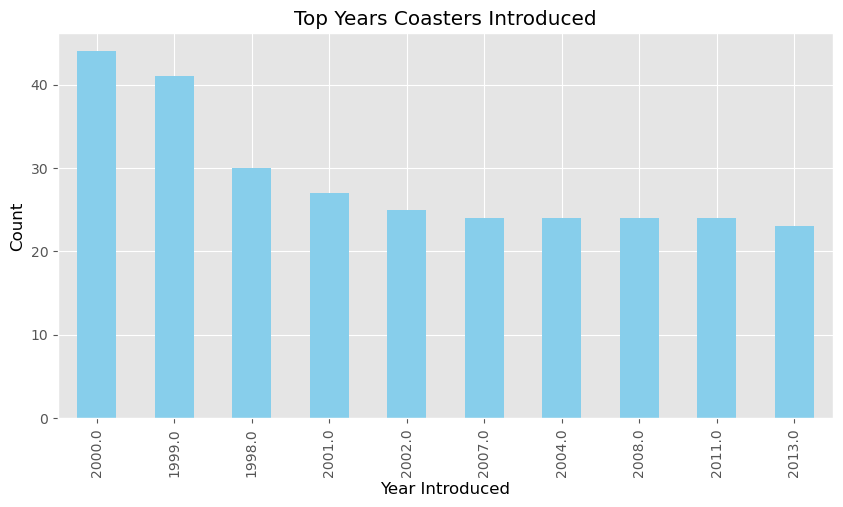

In [18]:

ax= df['Year_Introduced'].value_counts().head(10).plot(kind='bar',title='Top Years Coasters Introduced',color='skyblue',figsize=(10,5))
ax.set_xlabel('Year Introduced',color='black')
ax.set_ylabel('Count',color='black')
ax


#### Distribution of roller coaster speeds in km/h.

In [19]:
#add Speed km/h
df['Speed_km/h']=df['Speed_mph']*1.60934


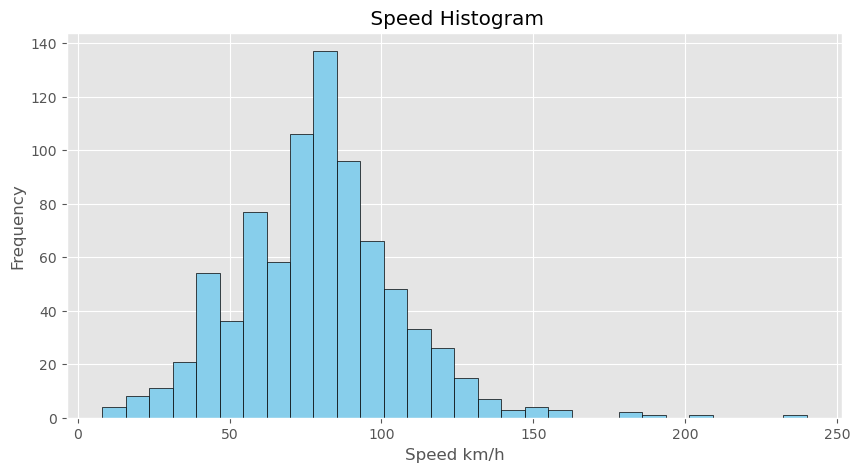

In [20]:
#HISTOGRAM
plt.figure(figsize=(10,5))
plt.hist(df['Speed_km/h'], bins=30, color='skyblue', edgecolor='black')

# Add title and labels
plt.title(' Speed Histogram')
plt.xlabel('Speed km/h')
plt.ylabel('Frequency')

# Show the plot
plt.show()


### 5- Feature Relationships
-Scatterplot
-Heatmap Correlation
-Pairplot

In [21]:
#Correlation between all variables in the data frame.
df.dropna().corr()

#We can see that the higher correlation between variables is in the speed and height

,Year_Introduced,latitude,longitude,Speed_mph,Height_ft,Gforce_clean,Speed_km/h
Year_Introduced,1.000000,0.075369,-0.023789,0.120728,0.088131,0.133678,0.120728
latitude,0.075369,1.000000,-0.674506,0.064399,-0.009732,0.299469,0.064399
longitude,-0.023789,-0.674506,1.000000,-0.117019,-0.115518,-0.307504,-0.117019
Speed_mph,0.120728,0.064399,-0.117019,1.000000,0.710692,0.599752,1.000000
Height_ft,0.088131,-0.009732,-0.115518,0.710692,1.000000,0.434951,0.710692
Gforce_clean,0.133678,0.299469,-0.307504,0.599752,0.434951,1.000000,0.599752
Speed_km/h,0.120728,0.064399,-0.117019,1.000000,0.710692,0.599752,1.000000


In [22]:
#add Height in meter
df['Height_meters']=df['Height_ft']*0.3048


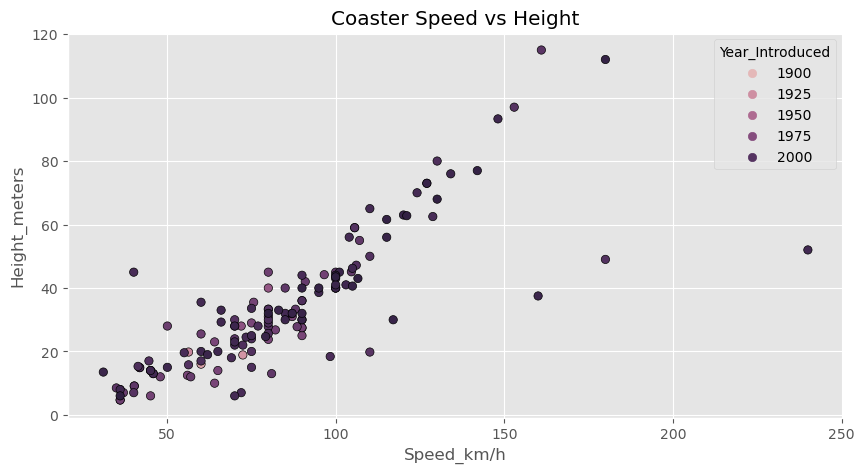

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Speed_km/h'], y=df['Height_meters'],
                edgecolor='black', alpha=1,hue='Year_Introduced',data=df).set(title="Coaster Speed vs Height")

plt.show()

<Figure size 1500x500 with 0 Axes>

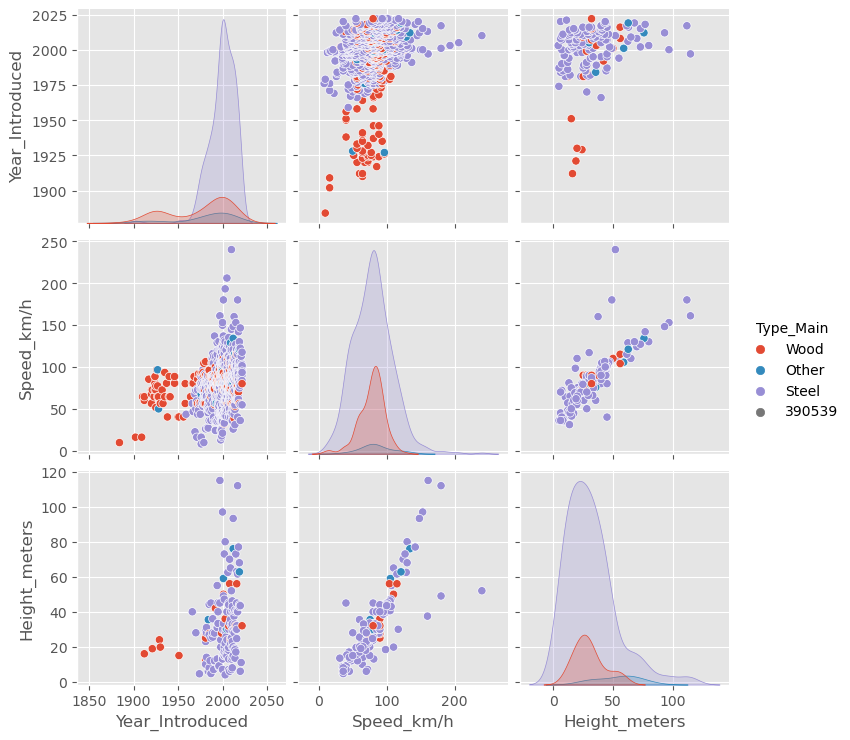

In [24]:
plt.figure(figsize=(15,5))
sns.pairplot(df,vars=['Year_Introduced','Speed_km/h', 'Height_meters'],hue='Type_Main')
plt.show()

In [25]:
df.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_date', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce_clean', 'Speed_km/h',
       'Height_meters'],
      dtype='object')

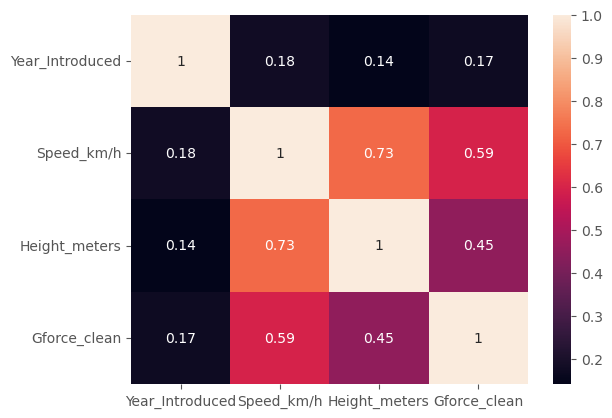

In [26]:
sns.heatmap(df[['Year_Introduced','Speed_km/h', 'Height_meters','Inversions','Gforce_clean']].dropna().corr(),annot=True)
plt.show()

### 6- Ask a question about the data



#### What are the locations with the fastest roller coasters?

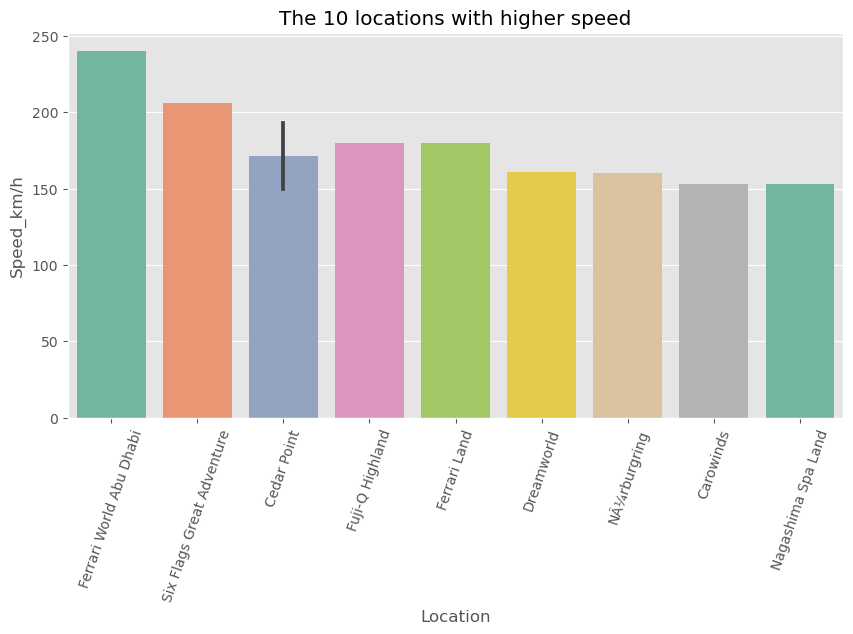

In [27]:
# Ordering the DataFrame using speed
df10= df[['Location','Speed_km/h']].query('Location!="Other"').sort_values(by='Speed_km/h',ascending=False).head(10)

#plot using seaborn
plt.figure(figsize=(10,5))
ax=sns.barplot(data=df10,x='Location',y='Speed_km/h',palette='Set2').set(title="The 10 locations with higher speed")
#rotar o rotulo do eixo x
plt.xticks(rotation=71)
plt.show()

In [28]:
#### What are the distributions in the map of  roller coasters?

In [1]:
mapa= folium.Map()
c=df['Coaster_Name']
lat= df['latitude'].dropna()
lon= df['longitude'].dropna()

for c,lat, lon in zip(c,lat, lon):
    folium.Marker([lat,lon],tooltip=c).add_to(mapa)
mapa

NameError: name 'folium' is not defined

In [41]:
df.dtypes

Coaster_Name               object
Location                   object
Status                     object
Manufacturer               object
Year_Introduced           float64
latitude                  float64
longitude                 float64
Type_Main                  object
Opening_date       datetime64[ns]
Speed_mph                 float64
Height_ft                 float64
Inversions                 object
Gforce_clean              float64
Speed_km/h                float64
Height_meters             float64
dtype: object